In [1]:
#Upload bonds.csv
from google.colab import files
uploaded = files.upload()

Saving bonds.csv to bonds.csv


In [0]:
ls

APM466bonds.csv  sample_data/


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [0]:
bonds = pd.read_csv("bonds.csv")

In [4]:
bonds

,Bond,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-13,2020-01-14,2020-01-15,coupon,ISIN,issue date,maturity date,Unnamed: 15
0,CDA 2020,99.85,99.86,99.86,99.86,99.86,99.86,99.86,99.86,99.86,99.86,1.50%,CA135087D929,2014-10-14,2020-03-01,1
1,CDA 2020,99.26,99.28,99.28,99.27,99.28,99.28,99.28,99.27,99.28,99.30,0.75%,CA135087E596,2015-04-13,2020-09-01,2
2,CDA 2021,98.89,98.93,98.95,98.94,98.92,98.92,98.88,98.90,98.90,98.93,0.75%,CA135087F254,2015-10-19,2021-03-01,3
3,CDA 2021,98.41,98.45,98.49,98.46,98.46,98.43,98.43,98.38,98.41,98.42,0.75%,CA135087F585,2016-04-11,2021-09-01,4
4,CDA 2022,97.57,97.63,97.66,97.65,97.64,97.60,97.61,97.57,97.58,97.61,0.50%,CA135087G328,2016-10-11,2022-03-01,5
5,CDA 2022,102.53,102.59,102.62,102.59,102.58,102.52,102.52,102.46,102.47,102.51,2.75%,CA135087ZU15,2011-08-02,2022-06-01,6
6,CDA 2023,100.31,100.42,100.48,100.45,100.44,100.35,100.31,100.27,100.31,100.38,1.75%,CA135087H490,2017-10-06,2023-03-01,7
7,CDA 2023,99.48,99.59,99.65,99.61,99.62,99.54,99.53,99.44,99.49,99.56,1.50%,CA135087A610,2012-07-30,2023-06-01,8
8,CDA 2024,102.52,102.65,102.75,102.58,102.68,102.53,102.47,102.46,102.54,102.64,2.25%,CA135087J546,2018-10-05,2024-03-01,9
9,CDA 19/24,98.72,98.95,99.29,99.11,99.25,98.99,99.03,99.06,98.99,99.10,1.50%,CA135087J967,2019-04-05,2024-09-01,10


In [0]:
from sympy import *
from scipy import optimize

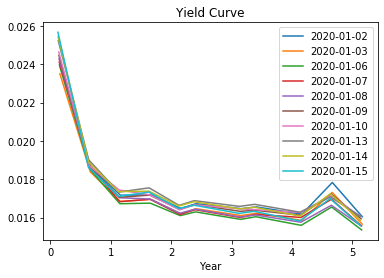

In [6]:
today_dates = ['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10','2020-01-13','2020-01-14','2020-01-15']
maturity_dates = []
dates6 = ['2020-06-01','2020-12-01','2021-06-01','2021-12-01','2022-06-01','2022-12-01','2023-06-01']
coupon_dates9 = []
coupon_dates6 = []

for m_date in bonds['maturity date']:
  maturity_dates.append(datetime.datetime.strptime(m_date, '%Y-%m-%d'))
  if m_date == '2022-06-01':
    m_date = '2022-09-01'
  elif m_date == '2023-06-01':
    m_date = '2023-09-01'
  coupon_dates9.append(datetime.datetime.strptime(m_date, '%Y-%m-%d'))
for date6 in dates6:
  coupon_dates6.append(datetime.datetime.strptime(date6, '%Y-%m-%d'))

coupons = bonds['coupon']
ytm_lst = []
lines = []
for date in today_dates:
  spots = []
  prices = bonds[date]
  today = datetime.datetime.strptime(date, '%Y-%m-%d')
  ytms = []
  x_axis = []
  for i in range(11):
    # i corresponds to i/2 year
    clean_price = prices[i]
    coupon = float(coupons[i][:-1])/2
    if maturity_dates[i] in [datetime.datetime.strptime('2022-06-01', '%Y-%m-%d'),
                             datetime.datetime.strptime('2023-06-01', '%Y-%m-%d')]:
      pre_date = datetime.datetime.strptime('2019-12-01', '%Y-%m-%d')
    else:
      pre_date = datetime.datetime.strptime('2019-09-01', '%Y-%m-%d')              

    accrued_int = (today - pre_date).days / 180* coupon
    dirty_price = clean_price + accrued_int
     
    time_to_mature = (maturity_dates[i]-today).days/365
    x_axis.append(time_to_mature)
    
    
    def eq(ytm):
      f = (100 + coupon)/((1+ytm/2)**(time_to_mature*2)) - dirty_price
      if maturity_dates[i] not in [datetime.datetime.strptime('2022-06-01', '%Y-%m-%d'),
                             datetime.datetime.strptime('2023-06-01', '%Y-%m-%d')]:
        for k in range(i):       
          t_to_now = (coupon_dates9[k] - today).days/365
          f+= coupon * exp(-t_to_now * ytm)
      else:
        for p in range(i-1):    
          t_to_now = (coupon_dates6[p] - today).days/365
          f+= coupon * exp(-t_to_now * ytm)
      return f
    
    answer = optimize.newton_krylov(eq, 0.05)

    ytms.append(answer)
        

  line, = plt.plot(x_axis,ytms)  
  ytm_lst.append(ytms)
  lines.append(line)
plt.legend(lines, today_dates)
plt.title('Yield Curve')
plt.xlabel('Year')
plt.show()

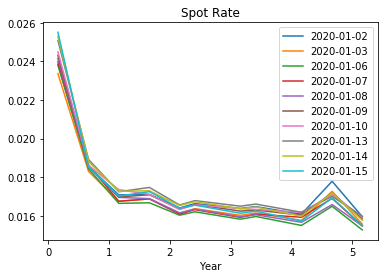

In [7]:
today_dates = ['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10','2020-01-13','2020-01-14','2020-01-15']
maturity_dates = []
for m_date in bonds['maturity date']:
  maturity_dates.append(datetime.datetime.strptime(m_date, '%Y-%m-%d'))  # pv of junes??
coupons = bonds['coupon']
spots_lst = []
lines = []
for date in today_dates:
  spots = []
  prices = bonds[date]
  today = datetime.datetime.strptime(date, '%Y-%m-%d')
  pv_sum_r = 0
  x_axis = []
  for i in range(11): 
    # i corresponds to i/2 year
    clean_price = prices[i]
    coupon = float(coupons[i][:-1])/2
    if maturity_dates[i] in [datetime.datetime.strptime('2022-06-01', '%Y-%m-%d'),
                             datetime.datetime.strptime('2023-06-01', '%Y-%m-%d')]:
      pre_date = datetime.datetime.strptime('2019-12-01', '%Y-%m-%d')
    else:
      pre_date = datetime.datetime.strptime('2019-09-01', '%Y-%m-%d')              

    accrued_int = (today - pre_date).days / 180* coupon
    dirty_price = clean_price + accrued_int
    
    time_to_mature = (maturity_dates[i]-today).days/365
     
    x_axis.append(time_to_mature)
    


    if i <=4 or i in [6,8,9,10]:
      spot_i = -log((dirty_price-coupon*pv_sum_r)/(coupon+100))/ time_to_mature
 
      spots.append(spot_i)
      pv_sum_r += exp(-(time_to_mature*spot_i))
    

    elif i == 5:
      pv_sum_r6 = 0
      spots6 = []
      for j in range(i-1):
        t_to_now6 = (coupon_dates6[j] - today).days/365
        spot6 = (spots[j] + spots[j+1])/2
        spots6.append(spot6)
        pv_sum_r6 += exp(-t_to_now6*spot6)
      spot_i = -log((dirty_price-coupon*pv_sum_r6)/(coupon+100))/ time_to_mature
      spots6.append(spot_i)
      spots.append(spot_i) # assume r_2209 = r_2206
      t2209 = (coupon_dates9[5] - today).days/365
      pv_sum_r += exp(-spot_i*t2209)
      pv_sum_r6 += exp(-spot_i*time_to_mature)

    

    elif i == 7:
      r2212 = (spots[-1] + spots[-2])/2  #r_2303, r2209
      spots6.append(r2212)
      pv_sum_r6 += exp(-r2212*(coupon_dates6[5]-today).days/365)
      spot_i = -log((dirty_price-coupon*pv_sum_r6)/(coupon+100))/ time_to_mature #r2306
      spots6.append(spot_i)
      spots.append(spot_i) # assume r_2309 = r_2306
      t2309 = (coupon_dates9[7] - today).days/365
      pv_sum_r += exp(-spot_i*t2309)
      pv_sum_r6 += exp(-spot_i*time_to_mature)


  if date == '2020-01-02':
    x_axis1 = x_axis.copy()
  line, = plt.plot(x_axis1, spots) 
  lines.append(line)
  spots_lst.append(spots)
plt.legend(lines, today_dates)
plt.xlabel('Year')
plt.title('Spot Rate')
plt.show()

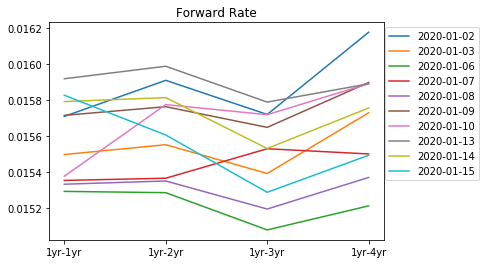

In [8]:
forwards_lst = []
lines = []
for date_i in range(10):
  spots = spots_lst[date_i]
  spots12345 = [np.interp(k, np.array(x_axis,dtype='float64'), np.array(spots,dtype='float64')) for k in [1,2,3,4,5]]
  forwards = []
  r1 = spots12345[0]
  for j in range(4):
      year_n = j + 1 #n-th yr
      year_n1 = j + 2 #n+1-th yr
      forw_j = (year_n1 * spots12345[j+1] - r1)/year_n
      forwards.append(forw_j)
  forwards_lst.append(forwards)
  line,=plt.plot(['1yr-1yr', '1yr-2yr', '1yr-3yr', '1yr-4yr'], forwards)
  lines.append(line)
plt.legend(lines, today_dates, loc=1, bbox_to_anchor=(1.3, 1))
plt.title('Forward Rate')
plt.show()


In [0]:
temp_mat_ytm = []
for i in range(10): #different days
  ytms = ytm_lst[i]
  temp_mat_ytm.append([np.interp(k, np.array(x_axis,dtype='float64'), np.array(ytms,dtype='float64')) for k in [1,2,3,4,5]])

temp_mat1_ytm = np.transpose(np.array(temp_mat_ytm[:9]))#j=1,...9
temp_mat2_ytm = np.transpose(np.array(temp_mat_ytm[1:]))#j=2,...10



In [10]:
X_ytm = np.log(temp_mat2_ytm/temp_mat1_ytm)
pd.DataFrame(X_ytm)

,0,1,2,3,4,5,6,7,8
0,-0.017979,-0.002840,0.007762,0.007002,0.001646,0.016831,-0.000243,-0.000601,-0.014466
1,-0.015920,-0.007811,0.005991,0.003082,0.012506,-0.001281,0.016125,-0.004104,-0.006566
2,-0.020976,-0.012042,0.006184,0.001918,0.017468,0.006434,0.008630,-0.007197,-0.013584
3,-0.020210,-0.015529,0.022937,-0.013347,0.021538,0.007679,0.003552,-0.011906,-0.015285
4,-0.025801,-0.026538,0.016317,-0.005071,0.026571,0.003316,0.000143,-0.006728,-0.016220


In [11]:
pd.DataFrame(np.cov(X_ytm), columns=['X1','X2','X3','X4','X5'],index=['X1','X2','X3','X4','X5'])

,X1,X2,X3,X4,X5
X1,0.000117,0.000059,0.000101,0.000110,0.000120
X2,0.000059,0.000105,0.000118,0.000126,0.000147
X3,0.000101,0.000118,0.000158,0.000181,0.000207
X4,0.000110,0.000126,0.000181,0.000277,0.000278
X5,0.000120,0.000147,0.000207,0.000278,0.000320


In [12]:
8.42577814e-04/np.trace(np.cov(X_ytm))

0.8626179249436996

In [13]:
pd.DataFrame(np.cov(np.transpose(forwards_lst)), columns=['X1','X2','X3','X4'],index=['X1','X2','X3','X4'])

,X1,X2,X3,X4
X1,5.531470e-08,4.581940e-08,2.827756e-08,3.764664e-08
X2,4.581940e-08,6.110043e-08,5.097218e-08,6.457331e-08
X3,2.827756e-08,5.097218e-08,5.878783e-08,6.355564e-08
X4,3.764664e-08,6.457331e-08,6.355564e-08,8.558567e-08


In [0]:
evalues, evectors = np.linalg.eig(np.cov(X_ytm))

In [15]:
evalues

array([8.42577814e-04, 6.81453793e-05, 4.59978514e-05, 2.68380862e-06,
       1.73634113e-05])

In [16]:
evectors

array([[-0.26468576, -0.89050398,  0.28357609,  0.23771013, -0.00475369],
       [-0.30134411, -0.01474589, -0.74564716,  0.49207955, -0.33292989],
       [-0.41813557, -0.20710541, -0.36529594, -0.80535107,  0.0154439 ],
       [-0.54872097,  0.31157632,  0.47467477, -0.02229627, -0.61319837],
       [-0.60266169,  0.25848165,  0.06955321,  0.2286135 ,  0.71615943]])

In [17]:
pd.DataFrame(evectors.T, columns=evalues)

,0.000843,0.000068,0.000046,0.000003,0.000017
0,-0.264686,-0.301344,-0.418136,-0.548721,-0.602662
1,-0.890504,-0.014746,-0.207105,0.311576,0.258482
2,0.283576,-0.745647,-0.365296,0.474675,0.069553
3,0.237710,0.492080,-0.805351,-0.022296,0.228614
4,-0.004754,-0.332930,0.015444,-0.613198,0.716159


In [0]:
evaluesf, evectorsf = np.linalg.eig(np.cov(np.transpose(forwards_lst)))

In [19]:
evectorsf

array([[-0.37391099, -0.83725506, -0.39255015, -0.07140671],
       [-0.51964858, -0.16339125,  0.83809042,  0.02954837],
       [-0.47937477,  0.37233596, -0.1975017 , -0.76977843],
       [-0.60029638,  0.36561346, -0.32326756,  0.63361592]])

In [20]:
pd.DataFrame(evectorsf.T, columns=evaluesf)

,2.156862e-07,3.524151e-08,2.720143e-09,7.140758e-09
0,-0.373911,-0.519649,-0.479375,-0.600296
1,-0.837255,-0.163391,0.372336,0.365613
2,-0.392550,0.838090,-0.197502,-0.323268
3,-0.071407,0.029548,-0.769778,0.633616


In [21]:
2.156862e-07/np.trace(np.cov(np.transpose(forwards_lst)))

0.8270536896902829